In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis import *
import json

# Load the relevant data

In [2]:
# Load the forecasting model data 
data = pd.read_csv('../data/ml_data_panel.csv', dtype={'SIC2': str})


## Load the harvested features labels

In [3]:
# Retrieve the labels
labels = load_char_labels()
identifiers, acc_ratios, stock_chars, option_chars, txt_features, targets, all_chars = labels['identifiers'], labels['acc_ratios'], labels['stock_chars'], labels['option_chars'], labels['txt_features'], labels['targets'], labels['all_chars']


# Drop mostly NA accounting ratios
acc_ratios.remove('rd_me')  
acc_ratios.remove('rd_sale') # investigate whether can be redeemed

In [12]:
data

,date,year,month,tic,conm,sector,subsector,market_equity,dolvol_126d,turnover_126d,...,niq_be,ocf_at,gp_at,niq_at,op_at,be_me,div12m_me,ni_me,sale_me,target_exret
0,20050228,2005,2,JJSF,J & J SNACK FOODS CORP,Consumer Staples,Food & Kindred Products,4.364695e+02,1.027584e+06,0.002604,...,0.041494,0.169935,0.590511,0.033460,0.211968,0.525235,0.002584,0.052031,0.954449,-0.023154
1,20050228,2005,2,PLXS,PLEXUS CORP,Information Technology,Electronic & Other Electrical (incl. 367 semis),4.976525e+02,5.409342e+06,0.010524,...,-0.095016,-0.039127,0.205654,-0.064130,0.080571,0.706141,0.000000,-0.063458,2.091536,-0.081461
2,20050228,2005,2,MSFT,MICROSOFT CORP,Information Technology,"Business Services (incl. computer programming,...",2.859322e+05,5.725156e+08,0.006475,...,0.033785,0.161338,0.341675,0.027363,0.224901,0.265608,0.120160,0.028265,0.132231,-0.041174
3,20050228,2005,2,RGEN,REPLIGEN CORP,Materials,Chemicals & Allied,6.917020e+01,3.639339e+05,0.005309,...,-0.064646,-0.134410,0.183160,-0.059221,0.038262,0.359664,0.000000,-0.111999,0.109006,-0.214643
4,20050228,2005,2,DLHC,DLH HOLDINGS CORP,Information Technology,"Business Services (incl. computer programming,...",3.068967e+01,3.179099e+04,0.000900,...,-0.004581,-0.031874,0.233589,-0.003668,-0.070213,1.009884,0.000000,-0.057511,1.215002,-0.034048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247588,20241231,2024,12,SPSC,SPS COMMERCE INC,Information Technology,"Business Services (incl. computer programming,...",7.253254e+03,3.664191e+07,0.005164,...,0.026114,0.163991,0.473307,0.021471,0.206998,0.097947,0.000000,0.009911,0.080488,-0.050730
247589,20241231,2024,12,PLOW,DOUGLAS DYNAMICS INC,Information Technology,Industrial/Computer Machinery (incl. 357),5.979036e+02,4.998834e+06,0.008427,...,0.099275,0.096572,0.247906,0.042175,0.123704,0.442073,0.045469,0.048260,0.959892,-0.079598
247590,20241231,2024,12,VPG,VISHAY PRECISION GROUP INC,Information Technology,Electronic & Other Electrical (incl. 367 semis),2.806015e+02,2.024922e+06,0.006262,...,0.013891,0.089784,0.341108,0.009873,0.110314,1.177898,0.000000,0.074843,1.188604,0.018068
247591,20241231,2024,12,FN,FABRINET,Information Technology,Electronic & Other Electrical (incl. 367 semis),8.507748e+03,1.266155e+08,0.014753,...,0.048692,0.176670,0.173244,0.036238,0.139684,0.205770,0.000000,0.034813,0.338864,-0.066365


In [4]:
data_point_counts = load_data_point_counts(data)
data_point_counts.head()

,conm,n_data,tic,min_date,max_date
0,IDEX CORP,239,IEX,20050228,20241231
1,J & J SNACK FOODS CORP,239,JJSF,20050228,20241231
2,INTEL CORP,239,INTC,20050228,20241231
3,INTERFACE INC,239,TILE,20050228,20241231
4,INTERPARFUMS INC,239,IPAR,20050228,20241231


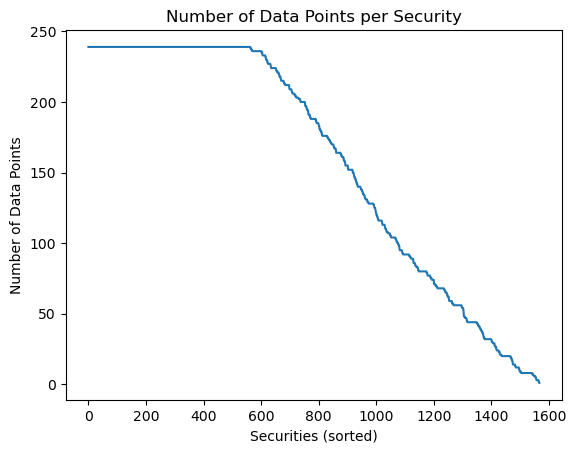

In [5]:
plt.plot(data_point_counts.n_data)
plt.title('Number of Data Points per Security')
plt.ylabel('Number of Data Points')
plt.xlabel('Securities (sorted)')
plt.show()

# Identify ticker GICs classes

In [6]:
tic_classes = load_gics_ticker_classes()
tic_classes.head()

,SIC2,n_data,n_tics,tics,conm,min_date,max_date,SIC2_descrip,sector,subsector
0,28.0,37018,250,"[RGEN, BCPC, AVD, IPAR, OLN, AMGN, PG, CL, FMC...","[REPLIGEN CORP, BALCHEM CORP -CL B, AMERICAN ...",20050228,20250630,NaN,NaN,NaN
1,73.0,32106,228,"[TRAK, XTIA, MSFT, DLHC, FI, UIS, CDNS, FICO, ...","[REPOSITRAK INC, XTI AEROSPACE INC, MICROSOFT ...",20050228,20250630,NaN,NaN,NaN
2,60.0,34181,157,"[BHRB, CHMG, ALRS, FMBH, MOFG, LCNB, ORRF, BFC...","[BURKE HERBERT FINL SRVS CORP, CHEMUNG FINANCI...",20050228,20250630,NaN,NaN,NaN
3,36.0,21608,120,"[PLXS, GE, AMAT, TXN, MSI, WHR, CTS, HUBB, FEL...","[PLEXUS CORP, GE AEROSPACE, APPLIED MATERIALS ...",20050228,20250630,NaN,NaN,NaN
4,38.0,20507,115,"[OSUR, CNMD, XRAY, TT, MMM, NOC, LHX, BAX, COH...","[ORASURE TECHNOLOGIES INC, CONMED CORP, DENTSP...",20050228,20250630,NaN,NaN,NaN


In [16]:
def merge_tics(series):
        # keep only list-like values; skip NaNs/empties
        seqs = [x for x in series.dropna() if isinstance(x, (list, tuple, set))]
        merged = sorted(set(itertools.chain.from_iterable(seqs)))
        return merged   
tic_classes = load_gics_ticker_classes()


In [18]:
tic_classes.tics

0     [RGEN, BCPC, AVD, IPAR, OLN, AMGN, PG, CL, FMC...
1     [TRAK, XTIA, MSFT, DLHC, FI, UIS, CDNS, FICO, ...
2     [BHRB, CHMG, ALRS, FMBH, MOFG, LCNB, ORRF, BFC...
3     [PLXS, GE, AMAT, TXN, MSI, WHR, CTS, HUBB, FEL...
4     [OSUR, CNMD, XRAY, TT, MMM, NOC, LHX, BAX, COH...
                            ...                        
62                                           [CVGW, BV]
63                                               [CALM]
64                                               [CRAI]
65                                               [BFAM]
66                                               [NVRI]
Name: tics, Length: 67, dtype: object

In [15]:

sector = (
    tic_classes
    .groupby('sector', dropna=False)
    .agg(
        n_subsector = ('subsector', 'count'),  # or 'nunique' if you want distinct subsectors
        subsectors  = ('subsector', lambda x: sorted(x.dropna().unique().tolist())),
        tics        = ('tics', merge_tics)     # merged, unique, sorted tickers per sector
    )
    .assign(n_tics=lambda d: d['tics'].str.len())  # 👈 number of tickers per sector
    .sort_values(['n_tics','n_subsector'], ascending=False)
    .reset_index()
)

,sector,n_subsector,subsectors,tics,n_tics
0,NaN,0,[],"[A, AA, AAL, AAMI, AAOI, AAON, AAP, AAPL, ABCB...",2000


In [7]:
sector_bins, subsector_bins = bin_tics_by_gics() 

In [8]:
sector_bins

,sector,n_subsector,subsectors,tics,n_tics
0,NaN,0,[],"[A, AA, AAL, AAMI, AAOI, AAON, AAP, AAPL, ABCB...",2000


In [9]:
subsector_bins

,subsector,sector,tics,n_tics
0,NaN,NaN,"[A, AA, AAL, AAMI, AAOI, AAON, AAP, AAPL, ABCB...",2000


In [10]:
subsector_bins.subsector.values

array([nan])

In [11]:
# ---- Copy/Paste everything below ----
import re
import unicodedata
import matplotlib.pyplot as plt
import pandas as pd

# 0) Your exact mapping: subsector (as pasted) -> short x-axis label
subsector_to_label = {
    "Chemicals & Allied": "Chemicals",
    "Business Services (incl. computer programming, data processing, software)": "Business Svcs (IT)",
    "Electronic & Other Electrical (incl. 367 semis)": "Electronics & Electrical",
    "Instruments (med/optical/scientific—often IT/HC split)": "Instruments (Med/Opt/Sci)",
    "Industrial/Computer Machinery (incl. 357)": "Industrial/Comp Machinery",
    "Electric, Gas & Sanitary Services": "Utilities (EG&S)",
    "Insurance Carriers": "Insurance Carriers",
    "Transportation Equipment": "Transport Equipment",
    "Oil & Gas Extraction": "Oil & Gas Extraction",
    "Security & Commodity Brokers": "Sec & Commodity Brokers",
    "Food & Kindred Products": "Food & Kindred",
    "Communications": "Communications",
    "Fabricated Metal Products": "Fabricated Metals",
    "Health Services": "Health Services",
    "Eating & Drinking Places": "Restaurants & Bars",
    "Misc Retail": "Misc Retail",
    "Wholesale—Durable": "Wholesale Durable",
    "Primary Metal Industries": "Primary Metals",
    "Apparel & Accessory Stores": "Apparel Stores",
    "Nondepository Credit": "Nondepository Credit",
    "Building Construction": "Building Construction",
    "Engineering, Accounting, Research & Management Services": "Eng/Acct/Research/Mgmt",
    "Holding & Investment Offices": "Holding & Investment",
    "Hotels & Lodging": "Hotels & Lodging",
    "Wholesale—Nondurable": "Wholesale Nondurable",
    "Auto Dealers & Service Stations": "Auto Dealers & Service",
    "Real Estate (GICS split out)": "Real Estate",
    "Misc Manufacturing": "Misc Manufacturing",
    "Trucking & Warehousing": "Trucking & Warehousing",
    "Furniture & Fixtures": "Furniture & Fixtures",
    "Rubber & Plastics": "Rubber & Plastics",
    "Apparel & Other Textile Products": "Apparel & Textile Prod",
    "General Merchandise Stores": "General Merchandise",
    "Paper & Allied": "Paper & Allied",
    "Heavy Construction": "Heavy Construction",
    "Insurance Agents & Services": "Insurance Agents/Services",
    "Metal Mining (often treated with Materials)": "Metal Mining",
    "Petroleum Refining & Related": "Petroleum Refining",
    "Transportation Services": "Transportation Svcs",
    "Printing & Publishing (media tilt)": "Printing & Publishing",
    "Water Transportation": "Water Transport",
    "Lumber & Wood (ex furniture)": "Lumber & Wood",
    "Educational Services (often treated here)": "Educational Services",
    "Nonmetallic Minerals (except fuels)": "Nonmetallic Minerals",
    "Air Transportation": "Air Transport",
    "Personal Services": "Personal Services",
    "Amusement & Recreation": "Amusement & Recreation",
    "Leather & Leather Products": "Leather Products",
    "Building Materials & Garden Stores": "Building Mat & Garden",
    "Motion Pictures (media/entertainment)": "Motion Pictures",
    "Construction—Special Trade": "Construction (Special)",
    "Stone, Clay, Glass, Concrete": "Stone/Clay/Glass/Concrete",
    "Home Furniture & Equipment Stores": "Home Furn & Equip Stores",
    "Coal Mining": "Coal Mining",
    "Depository Institutions": "Depository Institutions",
    "Textile Mills (tilts toward apparel/consumer)": "Textile Mills",
    "Food Stores": "Food Stores",
    "Auto Repair, Services & Parking": "Auto Repair & Parking",
    "Railroads": "Railroads",
    "Tobacco": "Tobacco",
    "Agricultural Services": "Agricultural Services",
    "Agricultural Production – Crops": "Ag Production - Crops",
    "Pipelines (except natural gas)": "Pipelines (ex Nat Gas)",
    "Services Not Elsewhere Classified": "Services NEC",
    "Social Services (e.g. child day care, community services)": "Social Services",
    "Agricultural Production – Livestock": "Ag Production - Livestock",
    "Legal Services": "Legal Services",
}

# 1) Canonicalizer to avoid NaNs from tiny formatting differences
def canon(s: str) -> str:
    if s is None:
        return ""
    s = unicodedata.normalize("NFKC", str(s)).strip()
    # normalize dashes to simple hyphen
    s = s.replace("—", "-").replace("–", "-")
    # collapse whitespace
    s = re.sub(r"\s+", " ", s)
    return s

# 2) Build a canonical lookup map based on your dict
canon_map = {canon(k): v for k, v in subsector_to_label.items()}


# apply canonical mapping
ml_data['subsector'] = ml_data['subsector'].map(canon_map)

NameError: name 'ml_data' is not defined

In [ ]:
print(f"Information Technology Tickers: {sector_bins.loc[sector_bins['sector'].eq('Information Technology')].tics.values[0]}")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
print(f"Information Technology Subsectors: {sector_bins.loc[sector_bins['sector'].eq('Information Technology')].subsectors.values[0]}")

In [ ]:
sector_bins.apply(lambda x: print(f"#Sector#: {x['sector']}, #Subsectors#: {x['subsectors']}"), axis=1);

In [ ]:
print(subsector_bins.subsector.values)

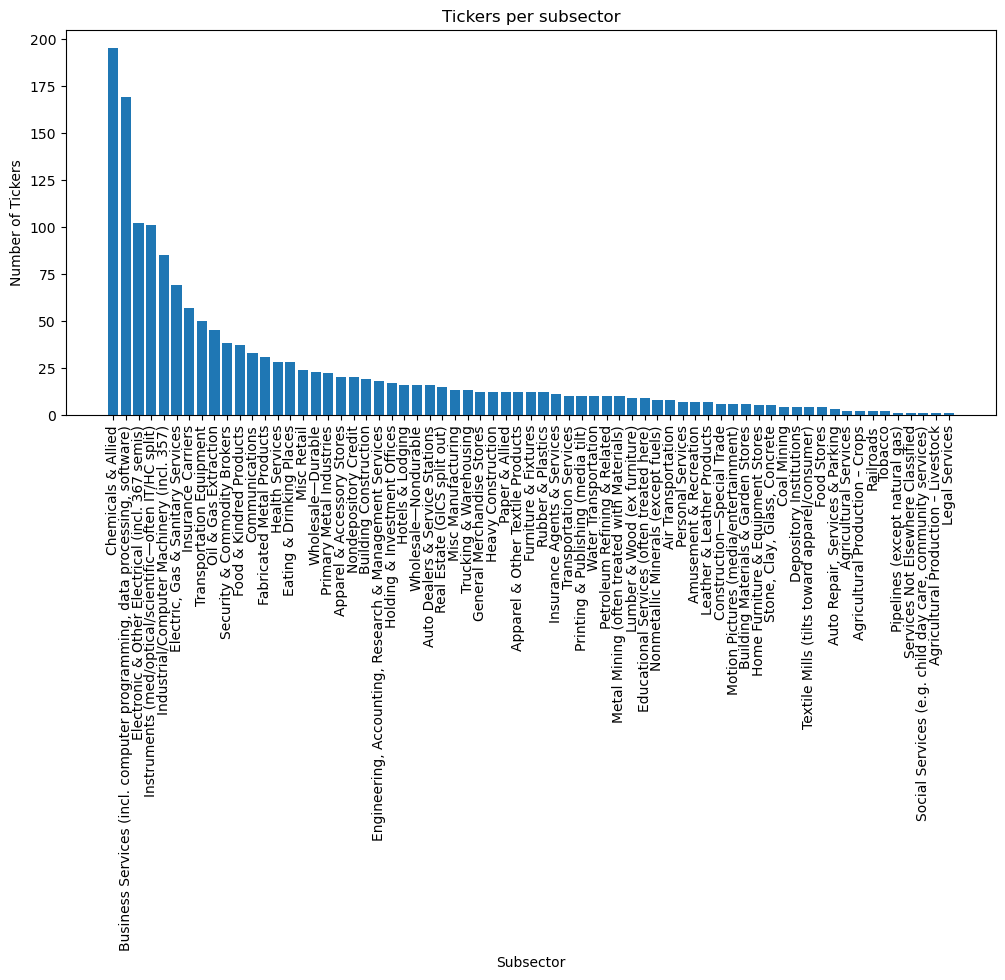

In [ ]:

df = subsector_bins.sort_values('n_tics', ascending=False)

# 6) Plot with 90° x-label rotation
plt.figure(figsize=(12, 5))
x = range(len(df))
plt.bar(x, df['n_tics'].to_numpy())
plt.xticks(x, df['subsector'].astype(str), rotation=90, ha='center')
plt.ylabel('Number of Tickers')
plt.xlabel('Subsector')
plt.title('Tickers per subsector')
plt.show()
